## Abalone Case Study

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.


# Importing important libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statistics as stat
import math
import warnings
warnings.filterwarnings("ignore")

# Importing dataset

In [77]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

In [78]:
df.sample(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
184,F,0.645,0.510,0.200,1.5675,0.6210,0.3670,0.46,12
2737,I,0.445,0.360,0.110,0.4235,0.1820,0.0765,0.14,9
667,F,0.485,0.380,0.150,0.6050,0.2155,0.1400,0.18,15
3662,I,0.550,0.450,0.140,0.7530,0.3445,0.1325,0.24,8
278,M,0.635,0.525,0.205,1.4840,0.5500,0.3115,0.43,20


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [80]:
# getting the shape
df.shape

(4177, 9)

In total we have 9 columns out of which Rings is the target variable which we need to predict to determine the abalone age

In [81]:
# Checking the statistics of the data
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
#The maximum age of the abalone in the given dataset is around 31 years (29+1.5)
#The  available has value of 0 which is not possible

In [82]:
# replacing zero values with mean

df['Height']=df['Height'].replace(0,df['Height'].mean())


In [83]:
# Verifying the dataset after replacing the zeros
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139583,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041715,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


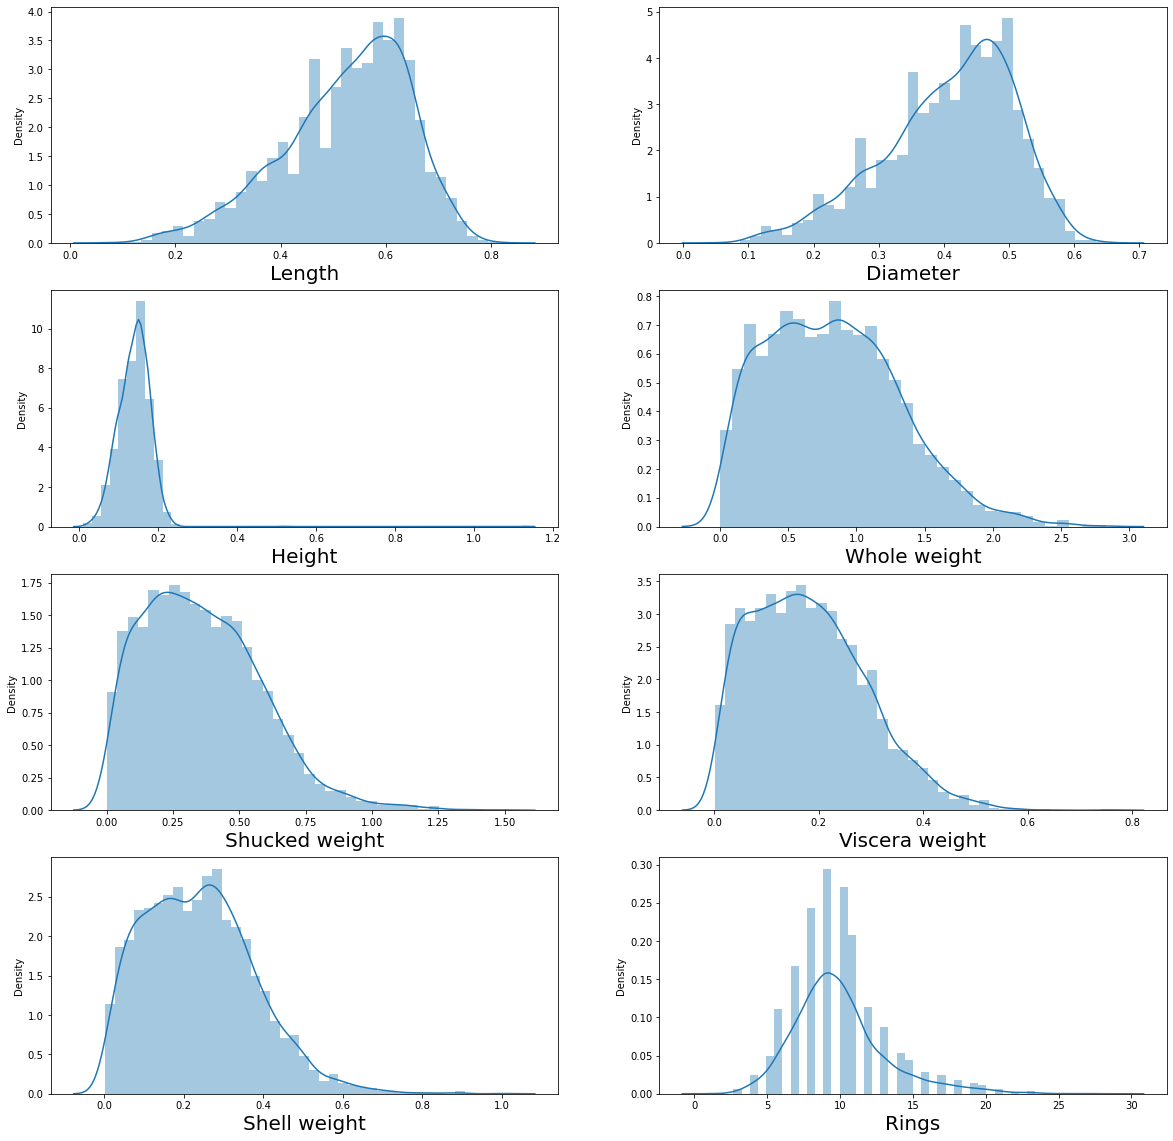

In [84]:
# Checking the data distribution for each column
df_new=df.drop('Sex',axis=1)
plt.figure(figsize=(20,20))
pltnumber=1

for column in df_new:
    if pltnumber<=8:
        ax=plt.subplot(4,2,pltnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
        
        pltnumber+=1
plt.show()

In [60]:
# Now we have dealt with th zero values. 


In [85]:
# Checkin for the null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

There are no null values in the dataset

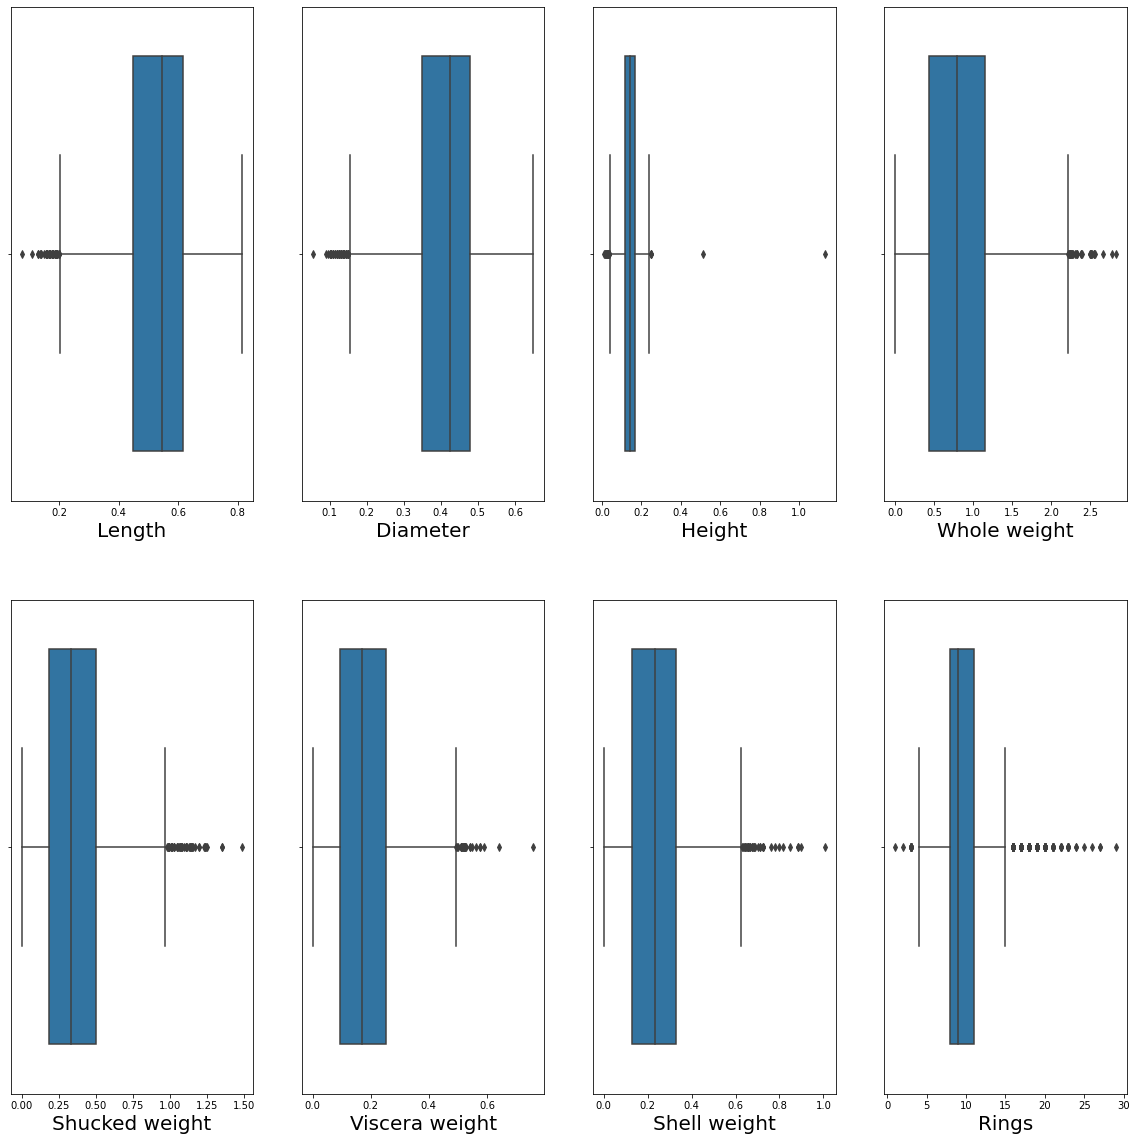

In [86]:
# Checking for the outliers
plt.figure(figsize=(20,20))
pltnumber=1

for column in df_new:
    if pltnumber<=8:
        ax=plt.subplot(2,4,pltnumber)
        sns.boxplot(df_new[column],orient='h')
        plt.xlabel(column,fontsize=20)
        
        pltnumber+=1
plt.show()

The outliers are not much distant from the maximum limit, thus we may proceed to th enext step

In [87]:
# Checking columns
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

# Correlation

<function matplotlib.pyplot.show(close=None, block=None)>

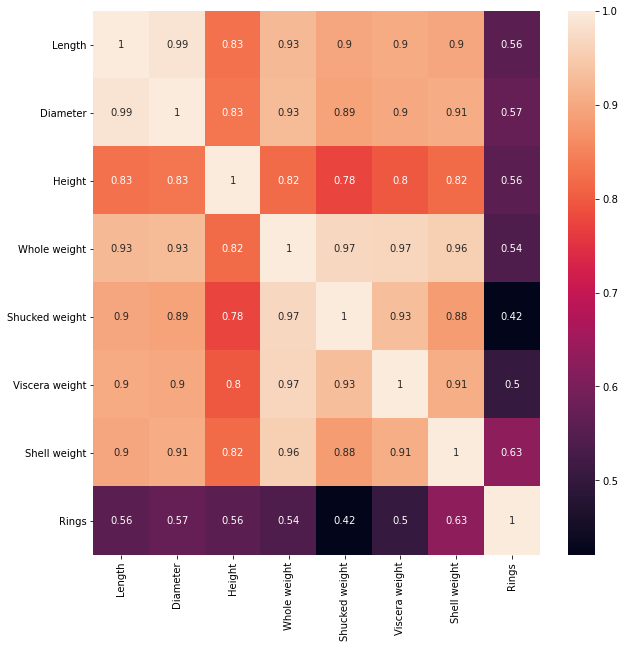

In [88]:
# Checking for the correlation 
plt.figure(figsize=(10,10))
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show

All the fetures are positively correlated with each other except for the height which has low corr value as compared to others.
Now w.r.t the target variable the correlationship is moderate which is ranging from (0.42 to 0.63)

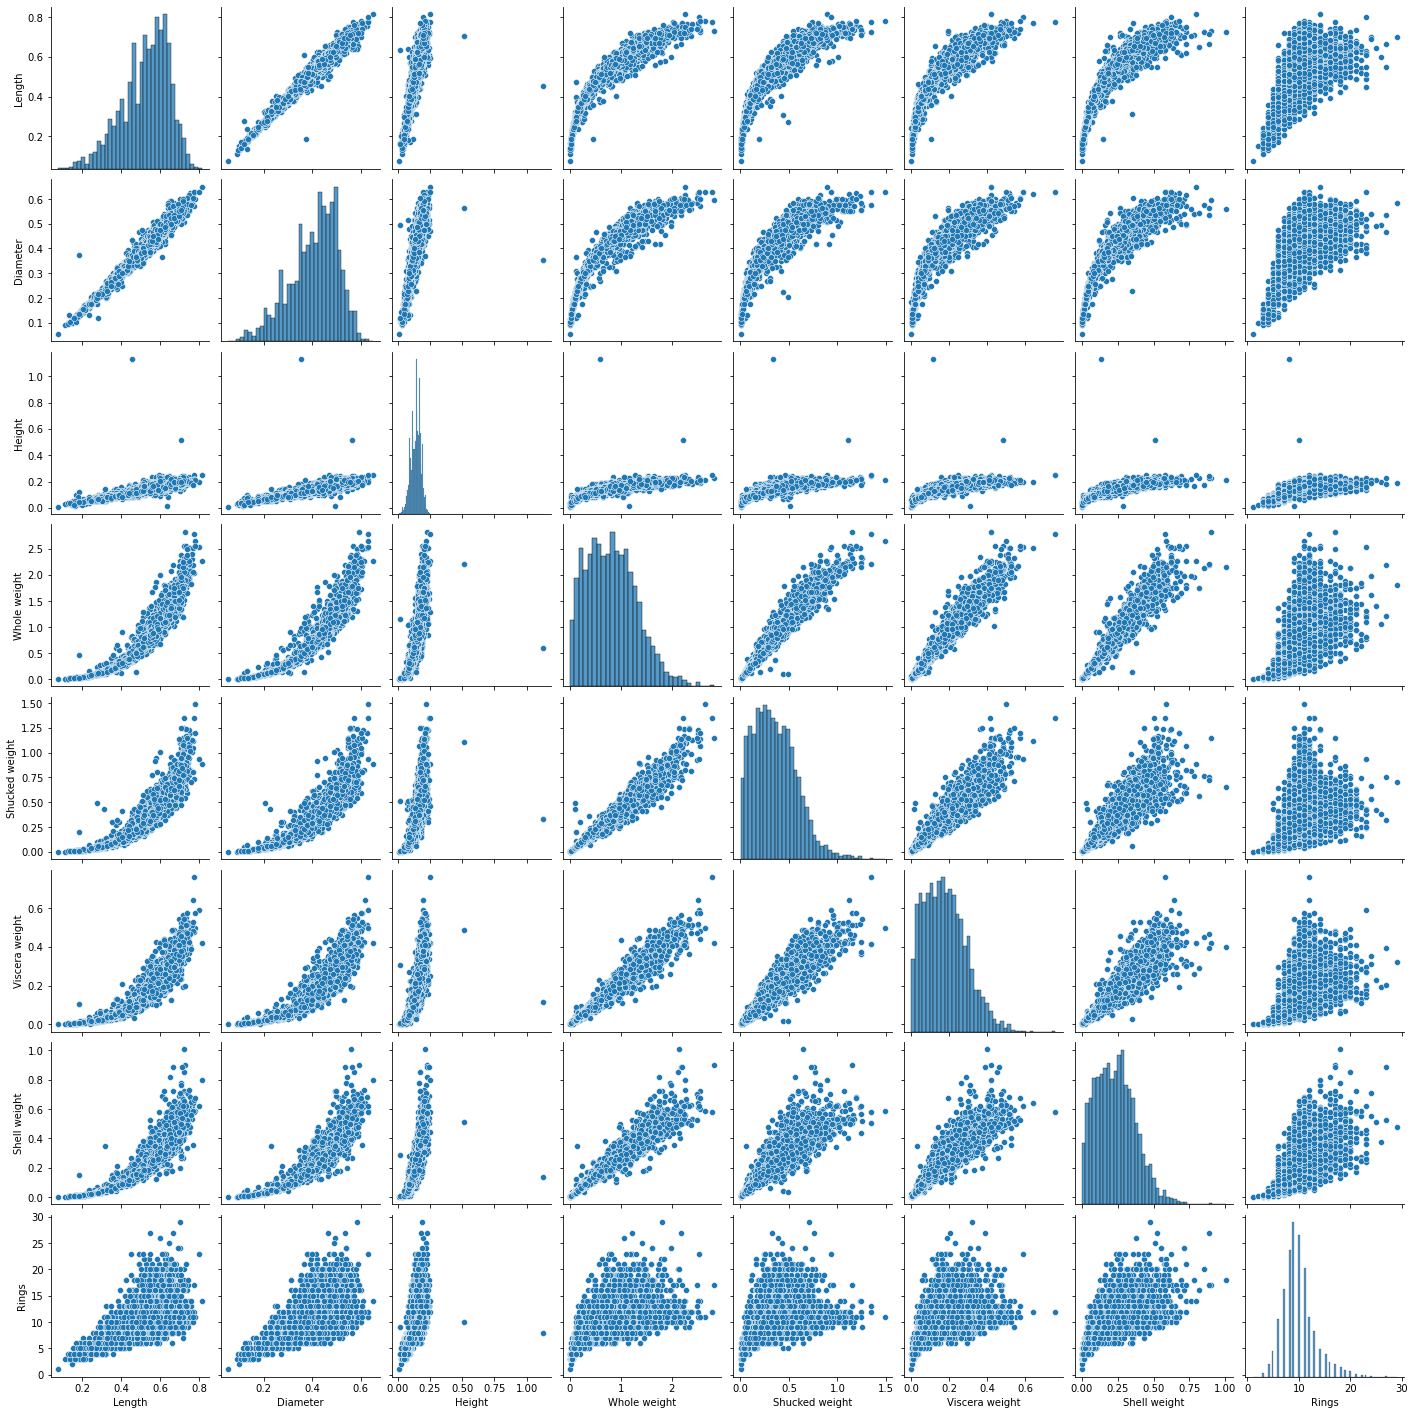

In [89]:
sns.pairplot(df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

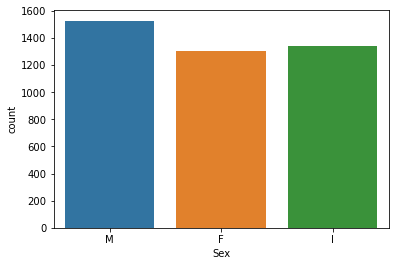

In [90]:
sns.countplot(df['Sex'])

In [91]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [92]:
# Converting categorical values into Numerical values
df['Sex']=le.fit_transform(df['Sex'])
df['Sex'].value_counts()
le.inverse_transform([2,1,0])

array(['M', 'I', 'F'], dtype=object)

In [93]:
# Male is encoded in 2 , Infant in 1 and female in 0

In [97]:
# Splitting the dataframe into features and labels 

x= df.drop('Rings',axis=1)
y=df['Rings']

In [98]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [100]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

# Training the dataset

In [101]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=256)
    

In [102]:
x_train

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
1030,0,0.645,0.515,0.150,1.2120,0.5150,0.2055,0.3850
205,0,0.440,0.340,0.140,0.4820,0.1860,0.1085,0.1600
421,1,0.490,0.380,0.120,0.5290,0.2165,0.1390,0.1550
2485,1,0.355,0.260,0.090,0.1925,0.0770,0.0380,0.0650
232,2,0.625,0.505,0.215,1.4455,0.4960,0.2870,0.4350
...,...,...,...,...,...,...,...,...
3174,2,0.450,0.355,0.120,0.3955,0.1470,0.0765,0.1450
1113,1,0.525,0.400,0.130,0.6455,0.3250,0.1245,0.1700
1776,2,0.485,0.370,0.155,0.9680,0.4190,0.2455,0.2365
423,1,0.290,0.225,0.070,0.1010,0.0360,0.0235,0.0350


In [103]:
x_train.shape

(3132, 8)

In [104]:
y_train.shape

(3132,)

In [105]:
x_test.shape

(1045, 8)

# Finding the best model

In [107]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lg=lr.predict(x_test)
r2score=r2_score(y_test,pred_lg)
cvsscore=cross_val_score(LinearRegression(),x_train,y_train,cv=2).mean()
print(r2score)
print(cvsscore)

0.5052297586600227
0.5191468775052518


In [108]:
# Lasso
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
ls=Lasso()
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
r2score=r2_score(y_test,pred_ls)
cvsscore=cross_val_score(Lasso(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

-0.0011074775492758704
-0.0014656048962306783
0.00035812734695480795


In [109]:
# Ridge
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
r2score=r2_score(y_test,pred_rd)
cvsscore=cross_val_score(Ridge(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

0.5002101116937503
0.5255951388363156
-0.025385027142565297


In [110]:
# ElasticNet
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)
pred_en=en.predict(x_test)
r2score=r2_score(y_test,pred_en)
cvsscore=cross_val_score(ElasticNet(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

0.06480402284392439
0.07560218382740824
-0.010798160983483851


In [111]:
# AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
ar=AdaBoostRegressor()
ar.fit(x_train,y_train)
pred_ad=ar.predict(x_test)
r2score=r2_score(y_test,pred_ad)
cvsscore=cross_val_score(AdaBoostRegressor(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

0.19654176599791862
0.24067120773627174
-0.04412944173835312


In [112]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rg=RandomForestRegressor(n_estimators=88)
rg.fit(x_train,y_train)
pred_rg=rg.predict(x_test)
r2score=r2_score(y_test,pred_rg)
cvsscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

0.5226702882410195
0.5368636096526453
-0.014193321411625881


# Random forest gives the best score of r2 as well as cv score 

# Score as 0.52

# Saving the file

In [113]:
import pickle
filename="World Happiness_report.pkl"
pickle.dump(rg,open(filename,"wb"))